# Tensors

In [1]:
# Importing TF and checking the version
import tensorflow as tf
print(tf.__version__)

2.10.0


In [2]:
# Dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
# Labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

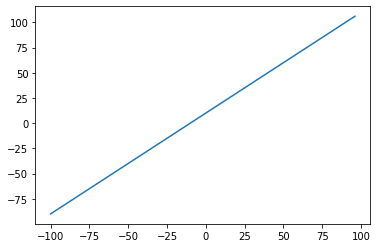

In [4]:
import matplotlib.pyplot as plt
plt.plot(X, y)

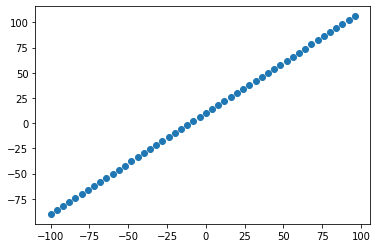

In [5]:
plt.scatter(X, y)

In [6]:
# Creating train / test datasets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [7]:
len(X_train), len(X_test)

(40, 10)

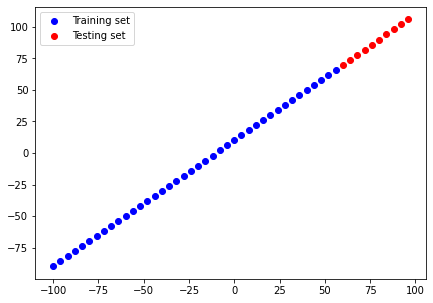

In [8]:
from cProfile import label


plt.figure(figsize=(7, 5))
# Plotting training data
plt.scatter(X_train, y_train, c="b", label="Training set")
# Plotting testing data
plt.scatter(X_test, y_test, c="r", label="Testing set")
# Show a legend
plt.legend()

In [9]:
# Creating NN
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

model.compile(loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 12.5824 - mae: 12.5824
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.0200 - mae: 14.0200
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 14.5808 - mae: 14.5808
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.8605 - mae: 9.8605
Epoch 5/100
2/2 [==============================] - 0s 0s/step - loss: 15.3543 - mae: 15.3543
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 13.5686 - mae: 13.5686
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 7.5688 - mae: 7.5688
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 8.8794 - mae: 8.8794
Epoch 9/100
2/2 [==============================] - 0s 0s/step - loss: 9.6588 - mae: 9.6588
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 11.3574 - mae: 11.3574
Epoch 11/100
2/2 [==============================] - 0s 0s/step - loss

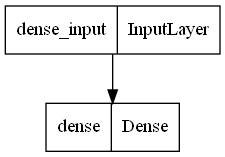

In [12]:
from tensorflow.keras.utils import plot_model

plot_model(model=model)

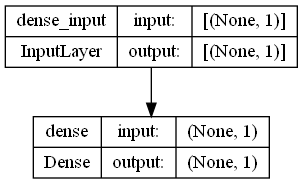

In [13]:
plot_model(model=model, show_shapes=True)

In [14]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 213ms/step


array([[51.983364],
       [55.359837],
       [58.73631 ],
       [62.112785],
       [65.48926 ],
       [68.86573 ],
       [72.24221 ],
       [75.61868 ],
       [78.995155],
       [82.37163 ]], dtype=float32)

In [15]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [17]:
# Function to visualise the outcomes of ML training, testing and predictions
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=y_pred):
    plt.figure(figsize=(7, 5))
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend()

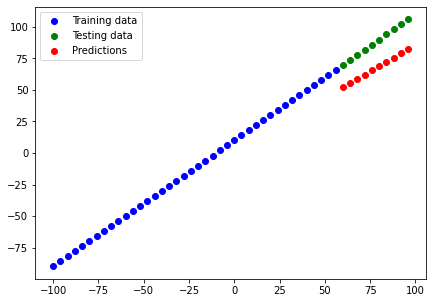

In [18]:
plot_predictions()